<a href="https://colab.research.google.com/github/Poonam20-design/Wine_Quality_Prediction/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red wine Quality**

In [1]:
#The problem statement is that we need to predict the quality of wine with respect to different parameters such as alcohol, acidity, ph etc.
#using Artificial Neural Network.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine_df = pd.read_csv('winequality-red.csv')

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.shape

(1599, 12)

**Let's have  a look at the input variables:**

**1. fixed acidity- non-volatile acids that do not evaporate readily.**

**2. volatile acidity- are high acetic acid in wine which leads to an unpleasant vinegar taste.**

**3. citric acid- acts as a preservative, adds freshness and flavor to wines.**

**4. residual sugar- amount of sugar remaining after fermentation stops.**

**5. chlorides- the amount of salt in wine.**

**6. free sulphur dioxide- prevents microbial growth.**

**7. total sulphur dioxide- amount of free + bound forms of SO2.**

**8. density- density of wine (affects sweetness)**

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **check distribution of numerical columns**

In [7]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#2. Missing value imputation
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#**Exploratory data analysis**

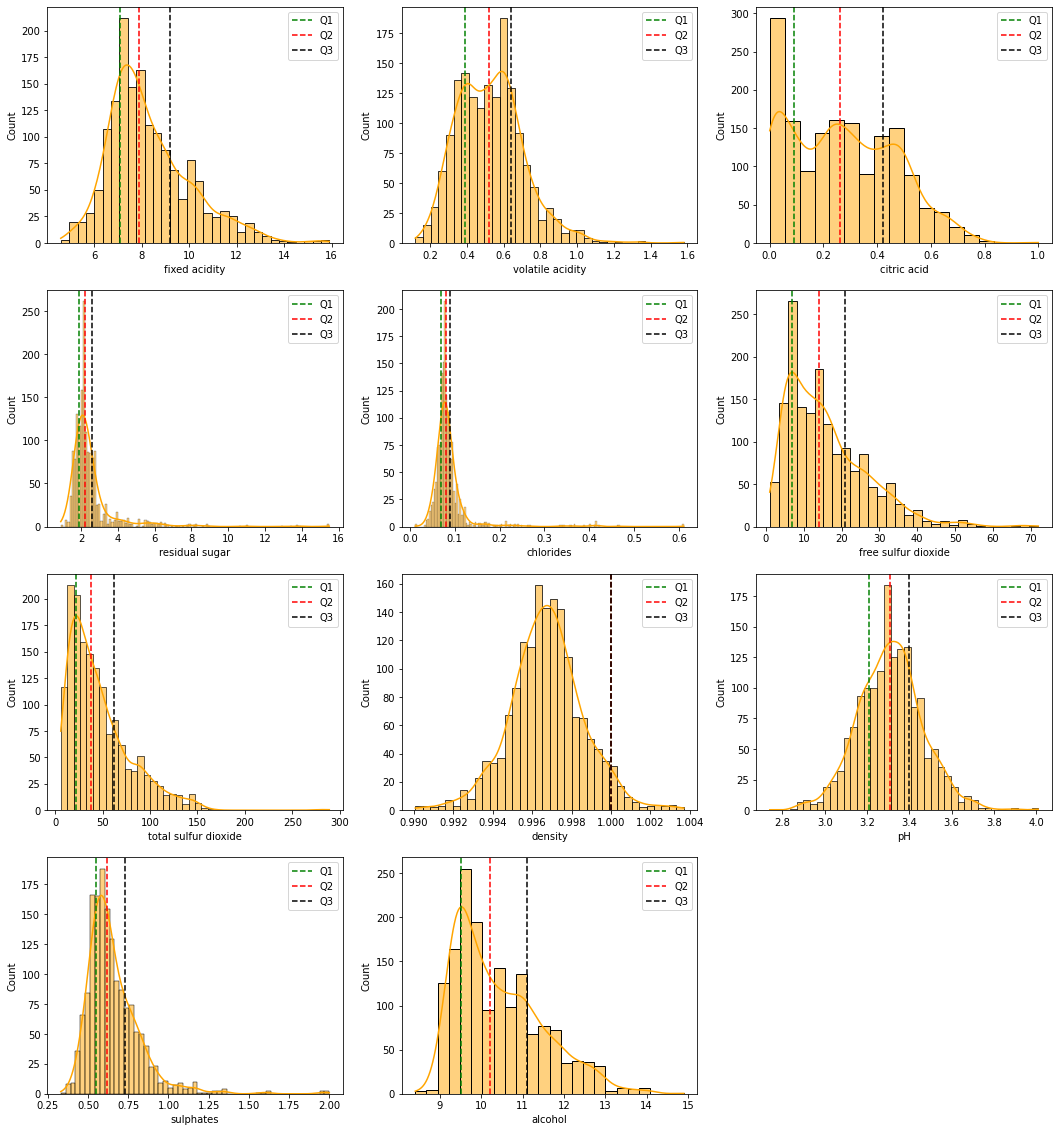

In [9]:
feature_ = wine_df.columns[:-1]
def get_percentile(feature,q_range):
    dist = wine_df[feature].describe()[str(q_range)+ '%']
    return  round(dist,2)
def render_counterplot():
    fig= plt.figure(figsize=(18,20))
    for column,feature in enumerate(feature_):
      fig.add_subplot(4,3,column+1)
      q1 = get_percentile(feature,25)
      q2 = get_percentile(feature,50)
      q3 = get_percentile(feature,75)
      sns.histplot(data=wine_df, x=feature, kde=True, color='orange')
      plt.axvline(q1,linestyle='--',color='green',label='Q1')
      plt.axvline(q2,linestyle='--',color='red',label='Q2')
      plt.axvline(q3,linestyle='--',color='black',label='Q3')
      plt.legend()
    plt.show()
render_counterplot()

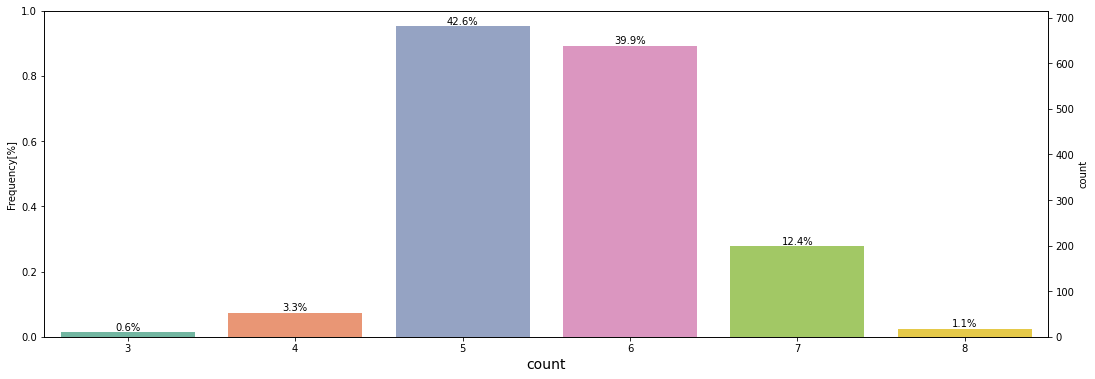

In [10]:
plt.figure(figsize=(18,6))

ax1= sns.countplot(x='quality',data=wine_df, palette='Set2')
plt.xlabel('Wine Quality',fontsize=14)
plt.xlabel('count',fontsize=14)

ax2= ax1.twinx()
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency[%]')

for p in ax1.patches:
    x= p.get_bbox().get_points()[:,0]
    y= p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(wine_df)),(x.mean(),y),ha='center', va='bottom')

In [11]:
ax1.patches[0].get_bbox()

Bbox([[-0.4, 0.0], [0.4, 10.0]])

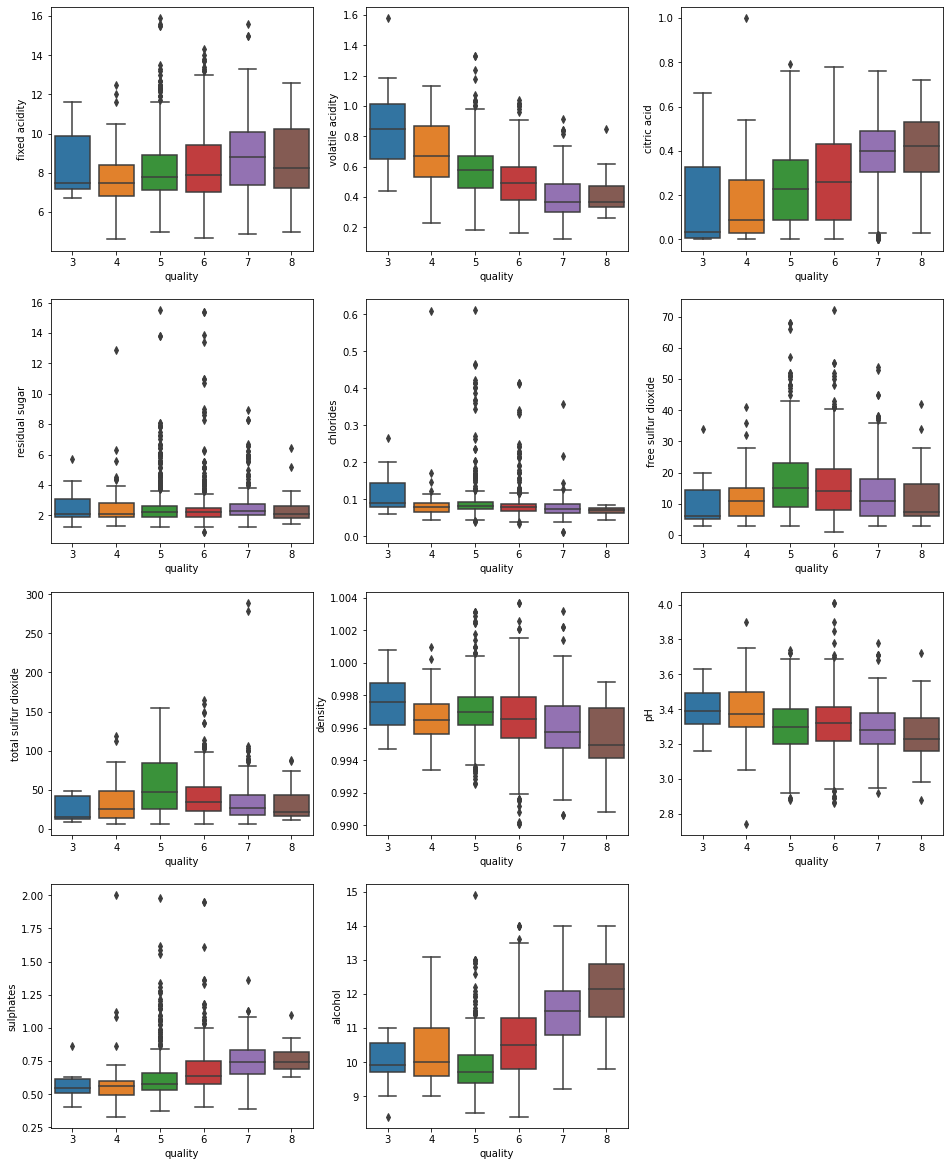

In [12]:
features_=wine_df.columns.values[:-1]
fig= plt.figure(figsize=(16,26))
for column,feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=wine_df,x='quality',y=feature)
plt.show()

# **Feature Engineering**

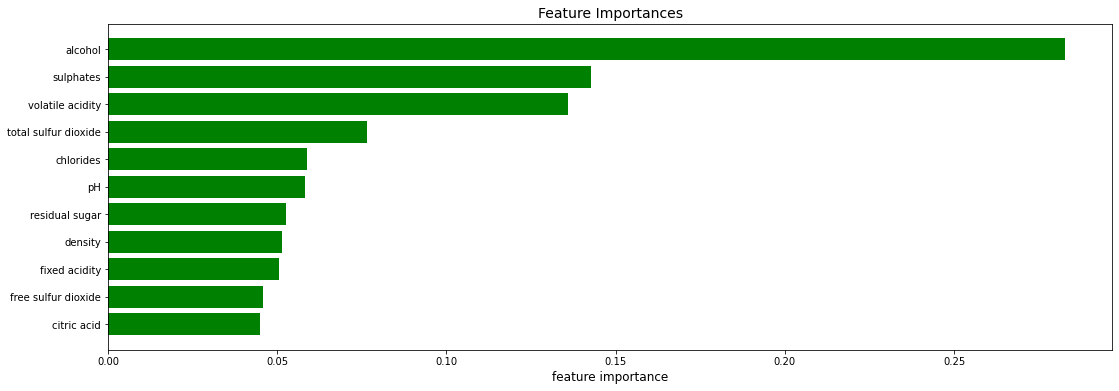

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

x = wine_df.drop(['quality'],axis=1)

rf.fit(x,wine_df.quality)

#store importance and feature names

features = wine_df.columns
importances= rf.feature_importances_
sorted_index = np.argsort(importances)[:]

plt.figure(figsize=(18,6))
plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(sorted_index)),importances[sorted_index],color='green',align='center')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])
plt.xlabel('feature importance',fontsize = 12)
plt.show()

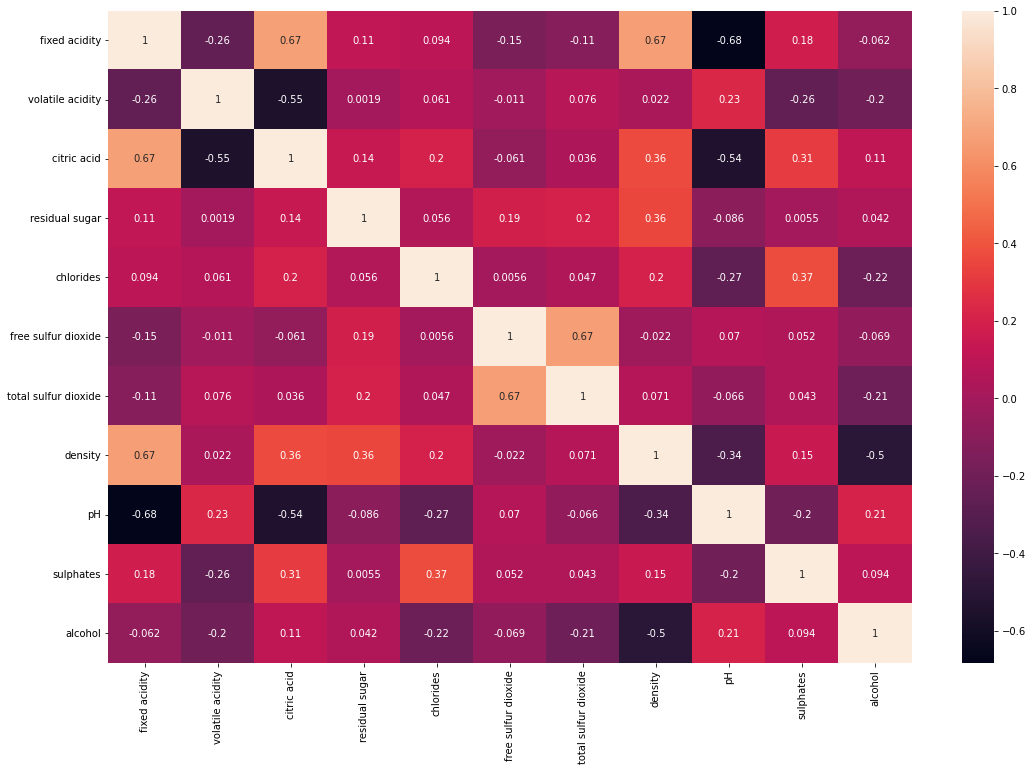

In [14]:
# check for multicollinearity
plt.figure(figsize=(18,12))

sns.heatmap(x.corr(),annot=True)
plt.show()

In [15]:
wine_df.drop(['fixed acidity','free sulfur dioxide'],axis=1,inplace=True)

In [16]:
# Handle imbalanced dataset

In [17]:
from imblearn.over_sampling import SMOTE
x = wine_df.drop('quality',axis='columns')
y = wine_df['quality']
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [19]:
x

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [21]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [22]:
!pip install tensorflow

In [23]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=9,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

In [25]:
y_train

array([2, 0, 3, ..., 3, 3, 2])

In [26]:
y_train= pd.DataFrame(y_train.reshape(len(y_train),1))
y_test= pd.DataFrame(y_test.reshape(len(y_test),1))

In [27]:
y_train

,0
0,2
1,0
2,3
3,2
4,0
...,...
1811,0
1812,2
1813,3
1814,3


In [28]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
57/57 [==============================] - 1s 3ms/step - loss: 1.3801 - accuracy: 0.4796
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.9893 - accuracy: 0.6178
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.8821 - accuracy: 0.6410
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.6597
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.8125 - accuracy: 0.6718
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.6867
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7762 - accuracy: 0.7004
Epoch 8/100
57/57 [==============================] - 0s 3ms/step - loss: 0.7633 - accuracy: 0.6894
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.7059
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.7364 - accuracy: 0.7021
Epoch 11/

In [47]:
y_predict = np.argmax(model.predict(x_test))

In [48]:
y_test

,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
449,0.0,0.0,0.0,1.0,0.0,0.0
450,0.0,0.0,1.0,0.0,0.0,0.0
451,0.0,0.0,0.0,1.0,0.0,0.0
452,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_train =pd.DataFrame(y_train)
y_test  =pd.DataFrame(y_test)

In [58]:
y_train = y.values.reshape(-1,1)
y_test = y.values.reshape(-1,1)

In [59]:
y_train =pd.DataFrame(y_train.reshape(len(y_train),1))
y_test  =pd.DataFrame(y_test.reshape(len(y_test),1))

In [60]:
y_train

,0
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

# **LogisticRegression**

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.5604166666666667


# **KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.50625


# **Decision Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.5875


# **Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.65625


In [79]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Decision Tree' ,'Random Forest'],
    'Score': [0.560,0.506,0.587,0.656]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.656,Random Forest
0.587,Decision Tree
0.560,Logistic Regression
0.506,KNN


In [ ]:
#Hence I use Random Forest algorithms for training my model.